In [16]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflowjs as tfjs 

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
# X = X/255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.array(y_train)
y_test = np.array(y_test)
# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# The output layer with 4 neurons, for 4 classes
model.add(Dense(10))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Training the model, with 20 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
225/225 [==============================] - 4s 20ms/step - loss: 2.8661 - accuracy: 0.1361 - val_loss: 2.1026 - val_accuracy: 0.2409
Epoch 2/20
225/225 [==============================] - 4s 17ms/step - loss: 1.7328 - accuracy: 0.4217 - val_loss: 1.1998 - val_accuracy: 0.6117
Epoch 3/20
225/225 [==============================] - 4s 16ms/step - loss: 1.0761 - accuracy: 0.6619 - val_loss: 0.6148 - val_accuracy: 0.8152
Epoch 4/20
225/225 [==============================] - 4s 16ms/step - loss: 0.7426 - accuracy: 0.7688 - val_loss: 0.4695 - val_accuracy: 0.8639
Epoch 5/20
225/225 [==============================] - 4s 19ms/step - loss: 0.6203 - accuracy: 0.8115 - val_loss: 0.4981 - val_accuracy: 0.8489
Epoch 6/20
225/225 [==============================] - 4s 18ms/step - loss: 0.5040 - accuracy: 0.8540 - val_loss: 0.4968 - val_accuracy: 0.8677
Epoch 7/20
225/225 [==============================] - 4s 16ms/step - loss: 0.4516 - accuracy: 0.8707 - val_loss: 0.4099 - val_accuracy: 0.8939

Saved model to disk
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


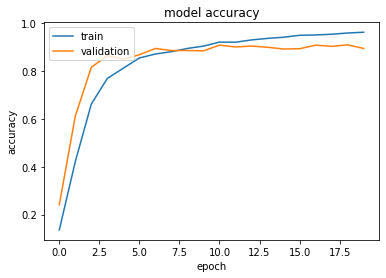

In [17]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('kerasmodel.h5')
tfjs.converters.save_keras_model(model, './tfjs_files')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


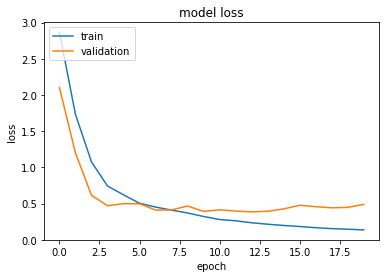

In [18]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

In [20]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=32)
print('test loss, test acc:', results)



# Evaluate on test data
63/63 [==============================] - 0s 4ms/step - loss: 0.4305 - accuracy: 0.8941
test loss, test acc: [0.4305470883846283, 0.8940529823303223]


In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix

predict = model.predict(X_test)
predict_class = np.argmax(predict, axis=1)
predict_class = predict_class.tolist()
predict_class

[7,
 7,
 7,
 5,
 5,
 9,
 6,
 5,
 5,
 5,
 8,
 3,
 4,
 6,
 3,
 5,
 5,
 0,
 6,
 5,
 7,
 8,
 1,
 6,
 7,
 3,
 1,
 3,
 3,
 9,
 9,
 6,
 7,
 7,
 9,
 2,
 1,
 4,
 4,
 1,
 4,
 5,
 4,
 1,
 7,
 5,
 6,
 9,
 4,
 6,
 2,
 6,
 6,
 9,
 4,
 0,
 9,
 3,
 0,
 1,
 8,
 0,
 1,
 7,
 7,
 2,
 4,
 9,
 6,
 9,
 9,
 9,
 4,
 1,
 1,
 7,
 6,
 4,
 5,
 9,
 0,
 9,
 7,
 2,
 6,
 8,
 8,
 9,
 7,
 0,
 1,
 8,
 8,
 9,
 2,
 9,
 9,
 9,
 5,
 1,
 5,
 8,
 7,
 0,
 1,
 0,
 0,
 3,
 4,
 3,
 5,
 6,
 7,
 3,
 5,
 7,
 5,
 5,
 4,
 1,
 0,
 0,
 9,
 4,
 5,
 0,
 9,
 3,
 6,
 5,
 8,
 5,
 1,
 3,
 7,
 4,
 8,
 8,
 1,
 1,
 2,
 1,
 3,
 8,
 0,
 3,
 7,
 8,
 9,
 4,
 1,
 2,
 0,
 4,
 6,
 5,
 7,
 9,
 9,
 1,
 4,
 6,
 7,
 4,
 8,
 2,
 9,
 8,
 6,
 5,
 3,
 4,
 1,
 2,
 6,
 5,
 2,
 7,
 0,
 1,
 8,
 6,
 3,
 9,
 5,
 5,
 0,
 9,
 6,
 4,
 8,
 2,
 5,
 1,
 8,
 2,
 7,
 6,
 6,
 2,
 8,
 2,
 6,
 2,
 3,
 4,
 7,
 8,
 0,
 4,
 7,
 7,
 4,
 2,
 0,
 2,
 4,
 9,
 0,
 9,
 1,
 5,
 0,
 2,
 6,
 5,
 5,
 1,
 4,
 6,
 9,
 8,
 7,
 4,
 6,
 8,
 7,
 5,
 6,
 3,
 3,
 4,
 2,
 5,
 5,
 0,
 0,
 6,
 8,
 1,


In [22]:
import seaborn as sn
import pandas as pd
cm =confusion_matrix(y_test, predict_class)
cm

array([[204,   3,   0,   2,   1,   1,   7,   4,   3,   0],
       [  1, 191,   5,   1,   1,   1,   0,   0,   2,   1],
       [  3,   2, 149,   6,   1,   5,  16,  11,   4,   3],
       [  0,   3,   4, 152,   2,  13,   0,  13,  13,   2],
       [  0,   0,   1,   0, 169,   3,   0,   0,   1,   1],
       [  1,   2,   2,   0,   7, 185,   0,   0,   1,   0],
       [  2,   1,   7,   0,   1,   2, 205,   2,   1,   1],
       [  1,   5,   2,   1,   2,   1,   1, 178,   0,   1],
       [  3,   3,   3,   0,   0,   4,   0,   2, 174,   3],
       [  0,   3,   1,   2,   0,   1,   0,   2,   1, 182]], dtype=int64)

In [23]:
CATEGORIES = ["apple","banana","baseball","bee","camera","car","clock","diamond","hand","tornado"]

df_cm = pd.DataFrame(cm, index = [i for i in CATEGORIES],
                  columns = [i for i in CATEGORIES])

df_cm

,apple,banana,baseball,bee,camera,car,clock,diamond,hand,tornado
apple,204,3,0,2,1,1,7,4,3,0
banana,1,191,5,1,1,1,0,0,2,1
baseball,3,2,149,6,1,5,16,11,4,3
bee,0,3,4,152,2,13,0,13,13,2
camera,0,0,1,0,169,3,0,0,1,1
car,1,2,2,0,7,185,0,0,1,0
clock,2,1,7,0,1,2,205,2,1,1
diamond,1,5,2,1,2,1,1,178,0,1
hand,3,3,3,0,0,4,0,2,174,3
tornado,0,3,1,2,0,1,0,2,1,182


In [24]:
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
num_classes = 10
TN = []
for i in range(num_classes):
    temp = np.delete(cm, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))

In [25]:
precision = TP/(TP+FP)
precision

array([0.94883721, 0.89671362, 0.85632184, 0.92682927, 0.91847826,
       0.85648148, 0.89519651, 0.83962264, 0.87      , 0.93814433])

In [26]:
np.average(precision)

0.8946625152006549

In [27]:
recall = TP/(TP+FN)
recall

array([0.90666667, 0.9408867 , 0.745     , 0.75247525, 0.96571429,
       0.93434343, 0.92342342, 0.92708333, 0.90625   , 0.94791667])

In [28]:
np.average(recall)

0.8949759757179951

In [29]:
f1 = 2*precision*recall/(precision+recall)
f1

array([0.92727273, 0.91826923, 0.79679144, 0.83060109, 0.94150418,
       0.89371981, 0.90909091, 0.88118812, 0.8877551 , 0.94300518])

In [30]:
np.average(f1)

0.8929197791115424